# 1-2-Assembly analysis
Manuel Jara-Espejo$^{1}$

Aboobaker lab, Department of Biology, University of Oxford

## Contents of notebook

1. Introduction 
2. Identify Gaps
3. Run Assembly statistics
4. Run busco
5. Compare gap prevalence in Phaw5.0 and Phaw5.1

## 1 Introduction

## 2. Identify gaps

In [1]:
%%bash

cd ./scripts
less 4_IdentifyGaps.sh

#See gaps identified in Phaw5.0
head /drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_fullAsm_stats/parhyale_hawaiensis_15Feb20182_1IWOV.fa.bed

echo ""

#See gaps identified in Phaw5.1
head /drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_sambaAsm/phaw_sambaAsm.scaff_seqs_editedScafNames.bed

#Commands used to identify gaps in Phaw5.0 and Phaw5.1 assemblies
##Command source: scaffoldgap2bed.py {genome} (https://github.com/lexnederbragt/sequencetools)

##Run command on Phaw5.0
nohup python3 /PATH/scaffoldgap2bed.py -i /drives/raid/AboobakerLab/manuel/data_phaw_analysis/phaw_reference/parhyale_hawaiensis_15Feb20182_1IWOV.fa -m 10 > parhyale_hawaiensis_15Feb20182_1IWOV.fa.bed &

##Run command on Phaw5.1
nohup python3 /PATH/scaffoldgap2bed.py -i /drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_sambaAsm/change_scafNames/phaw_sambaAsm.scaff_seqs_editedScafNames.fa -m 10 > phaw_sambaAsm.scaff_seqs_editedScafNames.bed &

Scaffold_2;HRSCAF=42	1275	3240	gap
Scaffold_2;HRSCAF=42	3413	3513	gap
Scaffold_3;HRSCAF=66	7071	7908	gap
Scaffold_3;HRSCAF=66	8089	8189	gap
Scaffold_7;HRSCAF=96	994	2691	gap
Scaffold_7;HRSCAF=96	2823	2923	gap
Scaffold_8;HRSCAF=132	9503	9952	gap
Scaffold_8;HRSCAF=132	11420	14944	gap
Scaffold_8;HRSCAF=132	15854	16800	gap
Scaffold_8

## 3. Run Assembly statistics

In [3]:
%%bash

cd ./scripts
less 5_run_assembly_stats.sh

#!/bin/bash 

#Commands used to obtain assembly statistics for Phaw5.0 and Phaw 5.1, including the intermediat assemblies generated

##Run on reference assembly Phaw 5.0
assembly-stats -t  /drives/raid/AboobakerLab/manuel/data_phaw_analysis/phaw_reference/parhyale_hawaiensis_15Feb20182_1IWOV.fa > parhyale_hawaiensis_15Feb20182_1IWOV.fa.fa_stats

#Run on assembly after filling Phaw5.0 using Samba
assembly-stats  -t /drives/ssd1/manuel/phaw/2022_analysis/asm_SAMBA_analysis/parhyale_hawaiensis_15Feb20182_1IWOV.fa.scaffolds.fa  > /drives/ssd1/manuel/phaw/2022_analysis/asm_SAMBA_analysis/parhyale_hawaiensis_15Feb20182_1IWOV.fa.scaffolds.fa

#Run on assembly after filling Phaw5.0 using TGS-Gap-Closer
assembly-stats  -t /drives/raid/AboobakerLab/manuel/data_phaw_analysis/asm_gap_filling/TGS-GapCloser_anlysis/wholeGenome_analysis/phaw_fullASm.scaff_seqs  > phaw_fullASm.scaff_seqs_stats

##Run on updated assembly (Phaw5.1) after filling Phaw5.0 using Samba + TGS-Gap-Closer
assembly-stats -t  /d

### Print phaw5.0 stats

In [12]:
import pandas as pd

asm_stats_phaw5_0 = pd.read_table("/drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_fullAsm_stats/parhyale_hawaiensis_15Feb20182_1IWOV.fa.fa_stats", sep="\t", header = 0)
asm_stats_phaw5_0.transpose()

,0
filename,/drives/raid/AboobakerLab/manuel/data_phaw_ana...
total_length,2755851339
number,283876
mean_length,9707.94
longest,111408412
shortest,200
N_count,558775491
Gaps,408799
N50,53694927
N50n,19


### Print phaw5.1 stats

In [10]:
asm_stats_phaw5_1 = pd.read_table("/drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_sambaAsm/phaw_sambaAsm.scaff_seqs_stats", sep="\t", header = 0)
asm_stats_phaw5_1.transpose()

,0
filename,/drives/raid/AboobakerLab/manuel/data_phaw_ana...
total_length,2823710058
number,280585
mean_length,10063.65
longest,114006073
shortest,199
N_count,92739792
Gaps,108574
N50,54784699
N50n,20


## 4. Run busco

In [7]:
%%bash

cd ./scripts
less 6_run_busco.sh

#!/bin/bash 

#Script to run busco analysis on phaw genome assembly

#Run busco on Phaw 5.0

if [ "$1" == "ref_assembly" ]; then

busco -i /drives/raid/AboobakerLab/manuel/data_phaw_analysis/phaw_reference/parhyale_hawaiensis_15Feb20182_1IWOV.fa -l arthropoda_odb10 --mode genome --cpu 16 -f --augustus -o ./busco_results_phaw5.0 

fi

#Run busco on Phaw 5.1
if [ "$1" == "gappfilled_assembly" ]; then

busco -i /drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_sambaAsm/change_scafNames/phaw_sambaAsm.scaff_seqs_editedScafNames.fa -l arthropoda_odb10 --mode genome --cpu 16 -f --augustus -o ./busco_results_phaw5.1

fi


### Print busco results - Phaw5.0 assembly

In [15]:
cat /drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/busco_analysis/busco_results_phaw5.0/short_summary.specific.arthropoda_odb10.busco_results_phaw5.0.txt

# BUSCO version is: 5.3.2 
# The lineage dataset is: arthropoda_odb10 (Creation date: 2020-09-10, number of genomes: 90, number of BUSCOs: 1013)
# Summarized benchmarking in BUSCO notation for file /drives/raid/AboobakerLab/manuel/data_phaw_analysis/phaw_reference/parhyale_hawaiensis_15Feb20182_1IWOV.fa
# BUSCO was run in mode: genome
# Gene predictor used: augustus

	***** Results: *****

	C:90.0%[S:88.2%,D:1.8%],F:3.1%,M:6.9%,n:1013	   
	911	Complete BUSCOs (C)			   
	893	Complete and single-copy BUSCOs (S)	   
	18	Complete and duplicated BUSCOs (D)	   
	31	Fragmented BUSCOs (F)			   
	71	Missing BUSCOs (M)			   
	1013	Total BUSCO groups searched		   

Dependencies and versions:
	hmmsearch: 3.1
	makeblastdb: 2.11.0+
	tblastn: 2.11.0+
	augustus: 3.4.0
	gff2gbSmallDNA.pl: None
	new_species.pl: None
	etraining: None


### Print busco results - Phaw5.1 assembly

In [16]:
cat /drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/busco_analysis/busco_results_phaw5.1/short_summary.specific.arthropoda_odb10.busco_results_phaw5.1.txt

# BUSCO version is: 5.3.2 
# The lineage dataset is: arthropoda_odb10 (Creation date: 2020-09-10, number of genomes: 90, number of BUSCOs: 1013)
# Summarized benchmarking in BUSCO notation for file /drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_sambaAsm/change_scafNames/phaw_sambaAsm.scaff_seqs_editedScafNames.fa
# BUSCO was run in mode: genome
# Gene predictor used: augustus

	***** Results: *****

	C:90.0%[S:85.9%,D:4.1%],F:3.5%,M:6.5%,n:1013	   
	912	Complete BUSCOs (C)			   
	870	Complete and single-copy BUSCOs (S)	   
	42	Complete and duplicated BUSCOs (D)	   
	35	Fragmented BUSCOs (F)			   
	66	Missing BUSCOs (M)			   
	1013	Total BUSCO groups searched		   

Dependencies and versions:
	hmmsearch: 3.1
	makeblastdb: 2.11.0+
	tblastn: 2.11.0+
	augustus: 3.4.0
	gff2gbSmallDNA.pl: None
	new_species.pl: None
	etraining: None


## 5. Compare gap prevalence in Phaw5.0 and Phaw5.1

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import collections
import numpy as np

#### Load files containing gap information for both, original 0 and gapfilled, assemblies

In [2]:
#Phaw5.0 - Reference assembly gap information
phaw_RefAsm_gaps = pd.read_csv("/drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_fullAsm_stats/parhyale_hawaiensis_15Feb20182_1IWOV.fa.bed",sep='\t',header=None)
phaw_RefAsm_gaps = phaw_RefAsm_gaps.assign(gap_len = phaw_RefAsm_gaps.iloc[:, 2] - phaw_RefAsm_gaps.iloc[:, 1] + 1)

#Phaw5.1 - Samba + TGSgapcloser Gap-filled assembly gap information
samba_gapFilled_asm = pd.read_csv("/drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_sambaAsm/phaw_sambaAsm.scaff_seqs.bed",sep='\t',header=None)
samba_gapFilled_asm = samba_gapFilled_asm.assign(gap_len = samba_gapFilled_asm.iloc[:, 2] - samba_gapFilled_asm.iloc[:, 1] + 1)

#### Plot Gap frequency vs gap length in Phaw5.0

Number of Gaps: 333096


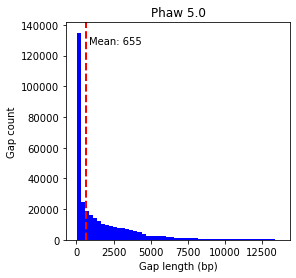

In [5]:
plt.figure(figsize=(4,4))
plt.hist(phaw_RefAsm_gaps['gap_len'],bins=50,color='blue')#,title = "Current assembly").ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title("Phaw 5.0")
plt.axvline(phaw_RefAsm_gaps['gap_len'].median(),color='red', ls='--', lw=2)
plt.xlabel('Gap length (bp)')
plt.ylabel('Gap count')

min_ylim, max_ylim = plt.ylim()
plt.text(phaw_RefAsm_gaps['gap_len'].median()*1.3,max_ylim*0.9,'Mean: {:.0f}'.format(phaw_RefAsm_gaps['gap_len'].median()))

print("Number of Gaps: " + str(phaw_RefAsm_gaps.shape[0]))
#filename = 'gapLength_phaw5.0'
#plt.savefig('gapLength_phaw5.0.tiff', dpi=600, format="tiff", pil_kwargs={"compression": "tiff_lzw"},bbox_inches = "tight")

#### Plot Gap frequency vs gap length in Phaw5.1

Number of Gaps: 93643


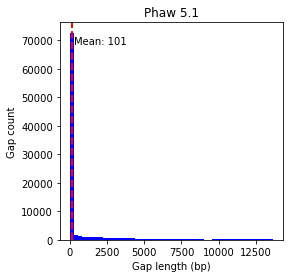

In [10]:
plt.figure(figsize=(4,4))
plt.hist(samba_gapFilled_asm['gap_len'],bins=50,color='blue')#,title = "Current assembly").ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title("Phaw 5.1")
plt.axvline(samba_gapFilled_asm['gap_len'].median(),color='red', ls='--', lw=2)
plt.xlabel('Gap length (bp)')
plt.ylabel('Gap count')

min_ylim, max_ylim = plt.ylim()
plt.text(samba_gapFilled_asm['gap_len'].median()*2.9,max_ylim*0.9,'Mean: {:.0f}'.format(samba_gapFilled_asm['gap_len'].median()))

print("Number of Gaps: " + str(samba_gapFilled_asm.shape[0]))
#plt.savefig('gapLength_phaw5.1.tiff', dpi=600, format="tiff", pil_kwargs={"compression": "tiff_lzw"},bbox_inches = "tight")

## 6. Compare gap prevalence in Phaw5.0 and Phaw5.1

In [45]:
%%bash
#Count Ns per scaffold in PHAW5.1 assembly. REmove header and last line(total genome size)
#/drives/raid/AboobakerLab/software/faCount \
#/drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_sambaAsm/change_scafNames/phaw_sambaAsm.scaff_seqs_editedScafNames.fa | cut -f1,2,7 | tail -n +2 | head -n -1 > phaw_sambaAsm.scaff_seqs_editedScafNames._Ncounts.txt

echo -e "Scaffold\tlength\tNs_perScaf\tN_fraction"
cat /drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_sambaAsm/phaw_sambaAsm.scaff_seqs_editedScafNames._Ncounts.txt | head -5

Scaffold	length	Ns_perScaf	N_fraction
Scaffold_N1	26740861	1289500
Scaffold_N2	39193855	1287071
Scaffold_N3	95645562	2788166
Scaffold_N4	56203476	1533074
Scaffold_N5	59486743	1607472


In [56]:
#Open dataframe containing gap information
NsbyScaffphaw5_1= pd.read_csv("/drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_sambaAsm/phaw_sambaAsm.scaff_seqs_editedScafNames._Ncounts.txt",sep='\t',header=None)
NsbyScaffphaw5_1["N_perc"] = (NsbyScaffphaw5_1[2]/NsbyScaffphaw5_1[1])*100
NsbyScaffphaw5_1["Seq_perc"] = 100 - NsbyScaffphaw5_1["N_perc"]
NsbyScaffphaw5_1

,0,1,2,N_perc,Seq_perc
0,Scaffold_N1,26740861,1289500,4.822208,95.177792
1,Scaffold_N2,39193855,1287071,3.283859,96.716141
2,Scaffold_N3,95645562,2788166,2.915102,97.084898
3,Scaffold_N4,56203476,1533074,2.727721,97.272279
4,Scaffold_N5,59486743,1607472,2.702236,97.297764
...,...,...,...,...,...
280580,Scaffold_137183_HRSCAF_141197,399,1,0.250627,99.749373
280581,Scaffold_241521_HRSCAF_245537,258,0,0.000000,100.000000
280582,Scaffold_73614_HRSCAF_77619,633,0,0.000000,100.000000
280583,Scaffold_77187_HRSCAF_81192,614,0,0.000000,100.000000


In [ ]:
#Edit dataframe to select only top 100 scaffols and collapse the rest
NsbyScaffphaw5_1.loc['mean']= NsbyScaffphaw5_1[100:].mean() #Averaging rows
NsbyScaffphaw5_1 = NsbyScaffphaw5_1.fillna('avg_scaffold')
NsbyScaffphaw5_1 = NsbyScaffphaw5_1.drop(NsbyScaffphaw5_1.iloc[100:280585].index,inplace=False)
NsbyScaffphaw5_1

In [54]:
NsbyScaffphaw5_1

,0,1,2,N_perc,Seq_perc
0,Scaffold_N1,26740861.0,1289500.0,4.822208,95.177792
1,Scaffold_N2,39193855.0,1287071.0,3.283859,96.716141
2,Scaffold_N3,95645562.0,2788166.0,2.915102,97.084898
3,Scaffold_N4,56203476.0,1533074.0,2.727721,97.272279
4,Scaffold_N5,59486743.0,1607472.0,2.702236,97.297764
...,...,...,...,...,...
95,Scaffold_258558_HRSCAF_262574,245.0,0.0,0.000000,100.000000
96,Scaffold_114641_HRSCAF_118654,458.0,0.0,0.000000,100.000000
97,Scaffold_6332_HRSCAF_9326,2337.0,0.0,0.000000,100.000000
98,Scaffold_264225_HRSCAF_268241,240.0,0.0,0.000000,100.000000


In [ ]:
#PLot N_percentage per sacffold in Phaw5.1 assembly

plt.figure(figsize=(7,3))
#data_for_barplot.plot(x="scaffold_id",kind="bar",stacked=True,figsize=(10, 8))

plt.bar(NsbyScaffphaw5_1["scaffold_id"],NsbyScaffphaw5_1["Seq_perc"], color='y')
plt.bar(NsbyScaffphaw5_1["scaffold_id"],NsbyScaffphaw5_1["N_perc"], color='r',bottom=data_for_barplot["Seq_perc"])

scaffold_order = np.arange(1, 102)

plt.xticks(NsbyScaffphaw5_1["scaffold_id"],list(np.append(scaffold_order[:-1],'101+')),rotation=45,fontsize =13,
           horizontalalignment="right",rotation_mode='anchor')
#plt.xticks(data_for_barplot["scaffold_id"][100:101],"101+",rotation=45, horizontalalignment="right",rotation_mode='anchor')
plt.yticks(list(range(0,200,10)),rotation=0,fontsize =13, horizontalalignment="right",rotation_mode='anchor')
plt.locator_params(axis='x', nbins=21)
plt.ylabel("Scaffold length (%)",fontsize=20)
plt.xlabel('Scaffold',fontsize=15)
colors = {'Ns':'red', 'ATCG':'y'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels,loc=4,prop={'size': 15})
plt.margins(x=0.015,y=0.015, tight=True)

#plt.savefig("NsbyScaff_phaw5.0.jpg", dpi=300,bbox_inches = 'tight')
plt.show()

In [4]:
#Load annotation file, obtained using Stringtie2 + Transdecoder, filtered by unigenes

scaffold_genes=[]

with open("/drives/ssd1/manuel/phaw/2021_analysis/annotation/stringtie2/stringtie2_merge/stringtie2_merged_unigenes_fixedAGAT.gtf") as f:

    for line in f:
        line = line.partition('#')[0]
        feature = line.rstrip().split("\t")[2:3]
        scaff_id = str(line.rstrip().split("\t")[:1][0])

        if 'gene' in feature:
            scaffold_genes.append(str(scaff_id))

#Count genes per scaffold
genesbyScaff_df = pd.DataFrame.from_dict(collections.Counter(scaffold_genes), orient='index').reset_index()
genesbyScaff_df = genesbyScaff_df.rename(columns={'index':'scaffold_id', 0:'gene_count'})
genesbyScaff_df= genesbyScaff_df.sort_values("gene_count",ascending=False)

genesbyScaff_df.head(5)

,scaffold_id,gene_count
37,Scaffold_135;HRSCAF=924,846
921,Scaffold_283823;HRSCAF=291659,816
953,Scaffold_283869;HRSCAF=291705,789
760,Scaffold_282861;HRSCAF=288508,767
732,Scaffold_282695;HRSCAF=288005,699


In [18]:
%%bash
#Calculate scaffolds length
#cat  cat  /drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_sambaAsm/change_scafNames/phaw_sambaAsm.scaff_seqs_editedScafNames.fa | awk '$0 ~ ">" {print c; c=0;printf substr($0,2,100) "\t"; } $0 !~ ">" {c+=length($0);} END { print c; }' > phaw_sambaAsm.scaff_seqs_editedScafNames.fa.lengths
cat /drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_sambaAsm/phaw_sambaAsm.scaff_seqs_editedScafNames.fa.lengths | head 


Scaffold_N1	26740861
Scaffold_N2	39193855
Scaffold_N3	95645562
Scaffold_N4	56203476
Scaffold_N5	59486743
Scaffold_N6	91876534
Scaffold_268158_HRSCAF_272174	236
Scaffold_147444_HRSCAF_151458	377
Scaffold_149109_HRSCAF_153123	374


In [16]:
#Open file containing scaffold lengths and merge with genesbyScaf dataframe

phaw51_scafLn = pd.read_csv("/drives/ssd1/manuel/phaw/2022_analysis/phaw_gapfilling/TGS-GapCloser_anlysis/results_sambaAsm/phaw_sambaAsm.scaff_seqs_editedScafNames.fa.lengths",sep='\t',header=None)
genesbyScaff_df = genesbyScaff_df.merge(phaw51_scafLn, left_on="scaffold_id", right_on=0,how='outer').sort_values(by=1,ascending=False).drop(0, axis=1).rename(columns={1: "scaf_ln"})
genesbyScaff_df = genesbyScaff_df.fillna(0)
genesbyScaff_df.head(5)

,scaffold_id,gene_count,scaf_ln,scaf_ln
0,Scaffold_135;HRSCAF=924,846.0,113994380,113994380
1,Scaffold_283869;HRSCAF=291705,789.0,100601370,100601370
2,Scaffold_283823;HRSCAF=291659,816.0,95668335,95668335
3,Scaffold_282695;HRSCAF=288005,699.0,91873957,91873957
4,Scaffold_282861;HRSCAF=288508,767.0,88248362,88248362
